<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [171]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [172]:
iowa_file = '/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
iowa.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [173]:
iowa.shape

(270955, 18)

In [174]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [175]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [176]:
# sale (Dollars)
# State Bottle Cost 
# State Bottle Retail  
# get rid of $ in all and convert to floats 

iowa['Date'] = pd.to_datetime(iowa['Date'])

In [177]:
iowa['MONTH'] = iowa['Date'].map(lambda val: val.month)
iowa['DAY'] = iowa['Date'].map(lambda val: val.day)
iowa['YEAR'] = iowa['Date'].map(lambda val: val.year)

### 3.2 Clean the columns

In [178]:
for col in ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']:
    iowa[col] = [float(x.replace('$', '')) for x in iowa[col]]
  
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 21 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
MONTH          

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [ ]:
# To tell if a store opened or closed we found the min and max date of every stores transactions.
# if a store opened in 2015 its min transaction date should be in 2015.
# if a store closed in 2015 its max transaction date will be in 2015.
# once we had every sored min and max we did a mask to git rid of the ones that open or closed in 2015
# the new datafram created is only stores that did not close or open in 2015.
# it is only stores that were opend the full year, even if they didn't make a sell for periods of time 
# within the year 

In [179]:
from datetime import date

date_group = iowa.groupby(['Store Number'])[['Date']].agg([np.min, np.max])

date_group.columns = ['mindate','maxdate' ]
date_group.reset_index()

date_group['min'] = date_group['mindate']
date_group['max'] = date_group['maxdate']
date_group['min'].head
 
mind = date(2015,01,01)
maxd = date(2015,12,31)
    
date_mask = (date_group['mindate']<=mind)|(date_group['maxdate']>=maxd)

date_group = date_group[date_mask]

stores_list = list(date_group.index)

stores_mask = iowa['Store Number'].isin(stores_list)

iowa_dated = iowa[stores_mask]
iowa_dated.head(4)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),MONTH,DAY,YEAR
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,11,4,2015
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,3,2,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,2,11,2016
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,2,3,2016


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [180]:
sub2015 = iowa_dated[iowa_dated['YEAR']==2015]
sub2015.groupby(['Store Number'])[['Sale (Dollars)']].sum().head(3)

,Sale (Dollars)
Store Number,
2106,146326.22
2113,9310.22
2130,111871.43


### 5.2 Calculate the profit each store is making in 2015.


In [181]:
iowa_dated['total_profits'] = (iowa_dated['State Bottle Retail'] - iowa_dated['State Bottle Cost']) * iowa_dated['Bottles Sold']
sub2015 = iowa_dated[iowa_dated['YEAR']==2015]
sub2015.groupby(['Store Number'])[['total_profits']].sum().head()

/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,total_profits
Store Number,
2106,48838.08
2113,3109.04
2130,37325.20
2152,2587.53
2178,8165.70


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [182]:
sub2015['profit_gallon'] = (sub2015['total_profits'] / sub2015['Volume Sold (Gallons)'])

/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [183]:
sub2015.groupby(['County'])[['profit_gallon']].sum().sort_values('profit_gallon',ascending=False).head()

,profit_gallon
County,
Polk,961990.228053
Linn,435983.482090
Scott,317522.447266
Black Hawk,280972.997051
Johnson,257205.453714


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [184]:
sub2015[['profit_gallon', 'Volume Sold (Gallons)']].corr()
# As the ratio increases the store size decreases. We can tell this by the negatice correlation betweeen the ratio 
#and store size(volume sold in gallons)

,profit_gallon,Volume Sold (Gallons)
profit_gallon,1.000000,-0.084622
Volume Sold (Gallons),-0.084622,1.000000


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [185]:
def cat_name(x):
    if type(x['Category Name']) == str:

        if "WHISKEY" in x['Category Name'] or "WHISKIES" in x['Category Name']  or "BOURBON" in x['Category Name'] or "RYE" in x['Category Name']:
            x['Broad_Category'] = "Whiskey"
        elif "VODKA" in x['Category Name']:
            x['Broad_Category'] = "Vodka"
        elif "GIN" in x['Category Name']:
            x['Broad_Category'] = "Gin"
        elif "SCHNAPPS" in x['Category Name']:
            x['Broad_Category'] = "Schnapps"
        elif "RUM" in x['Category Name']:
            x['Broad_Category'] = "Rum"
        elif "TEQUILA" in x['Category Name']:
            x['Broad_Category'] = "Tequila"
        elif "BRANDIES" in x['Category Name']:
            x['Broad_Category'] = "Brandies"
        elif "CREME" in x['Category Name'] or "LIQUEUR" in x['Category Name'] or "AMARETTO" in x['Category Name']or "ANISETTE" in x['Category Name']:
            x['Broad_Category'] = "Liquers"   
        else:
            x['Category Name'] = "Other"
    return x

iowa = iowa.apply(cat_name, axis =1)

iowa.head(2)

,Bottle Volume (ml),Bottles Sold,Broad_Category,Category,Category Name,City,County,County Number,DAY,Date,...,MONTH,Sale (Dollars),State Bottle Cost,State Bottle Retail,Store Number,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters),YEAR,Zip Code
0,750,12,Brandies,1051100.0,APRICOT BRANDIES,SUMNER,Bremer,9.0,4,2015-11-04,...,11,81.00,4.50,6.75,3717,55,2.38,9.0,2015,50674
1,750,2,Whiskey,1011100.0,BLENDED WHISKIES,DAVENPORT,Scott,82.0,2,2016-03-02,...,3,41.26,13.75,20.63,2614,395,0.40,1.5,2016,52807


### 5.7 Do relationships exist between the broader liquor type and profit?

In [186]:
iowa['total_profits'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']

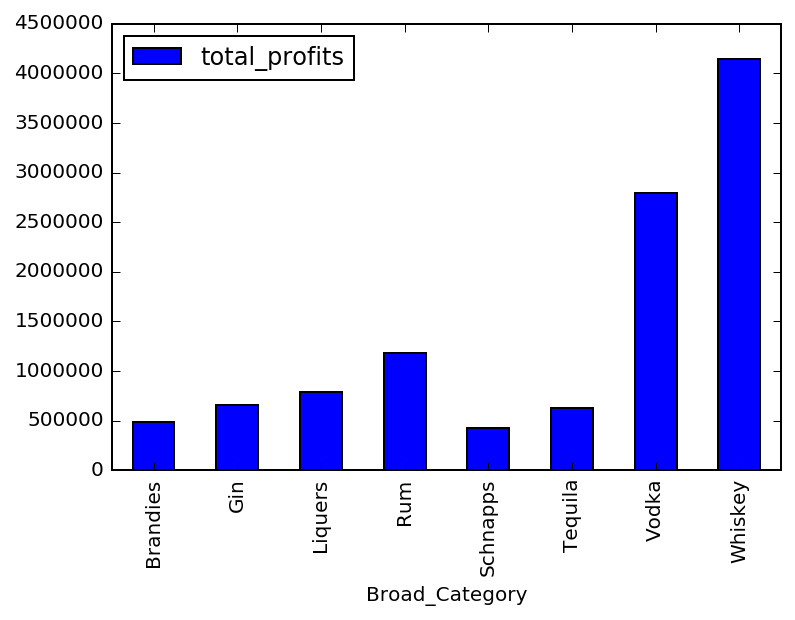

In [187]:
iowa.groupby(['Broad_Category'])[['total_profits']].sum().plot(kind = 'bar')
# Yes there is a relaaionship between broader liquor types and profit. Some liquor types 
# have a much higher total profit than others 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

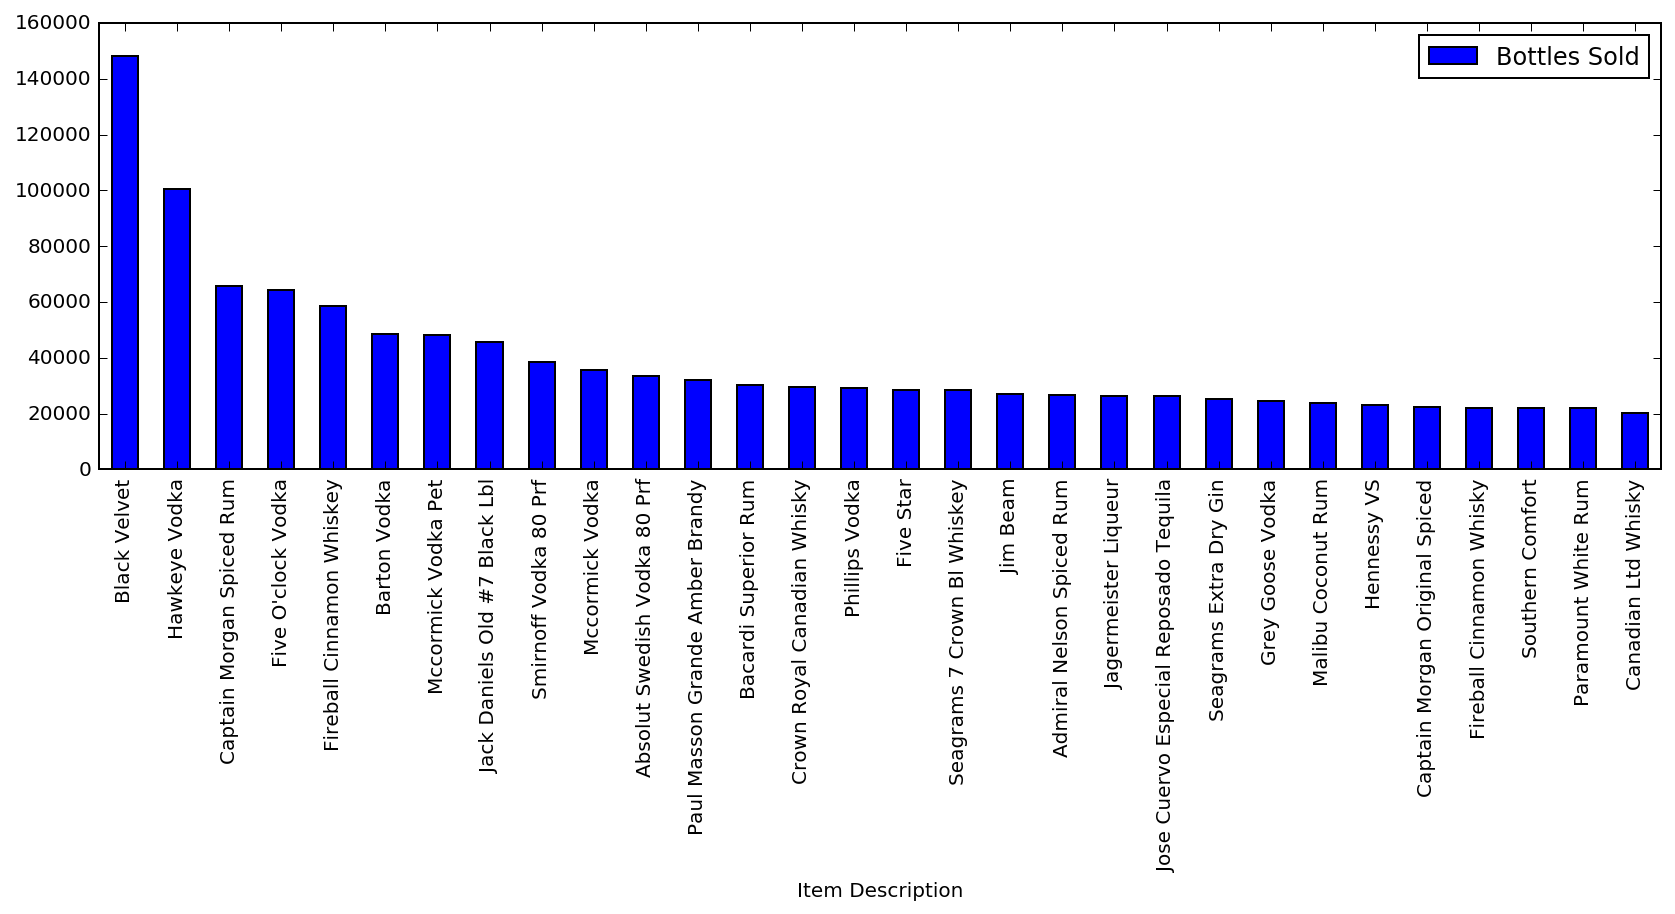

In [188]:
# Yes. Below are the 30 liquor brands that have the highest sales
iowa.groupby(['Item Description'])[['Bottles Sold']].sum().sort_values('Bottles Sold', ascending = False).head(30).plot(kind = 'bar',figsize=(14,4))


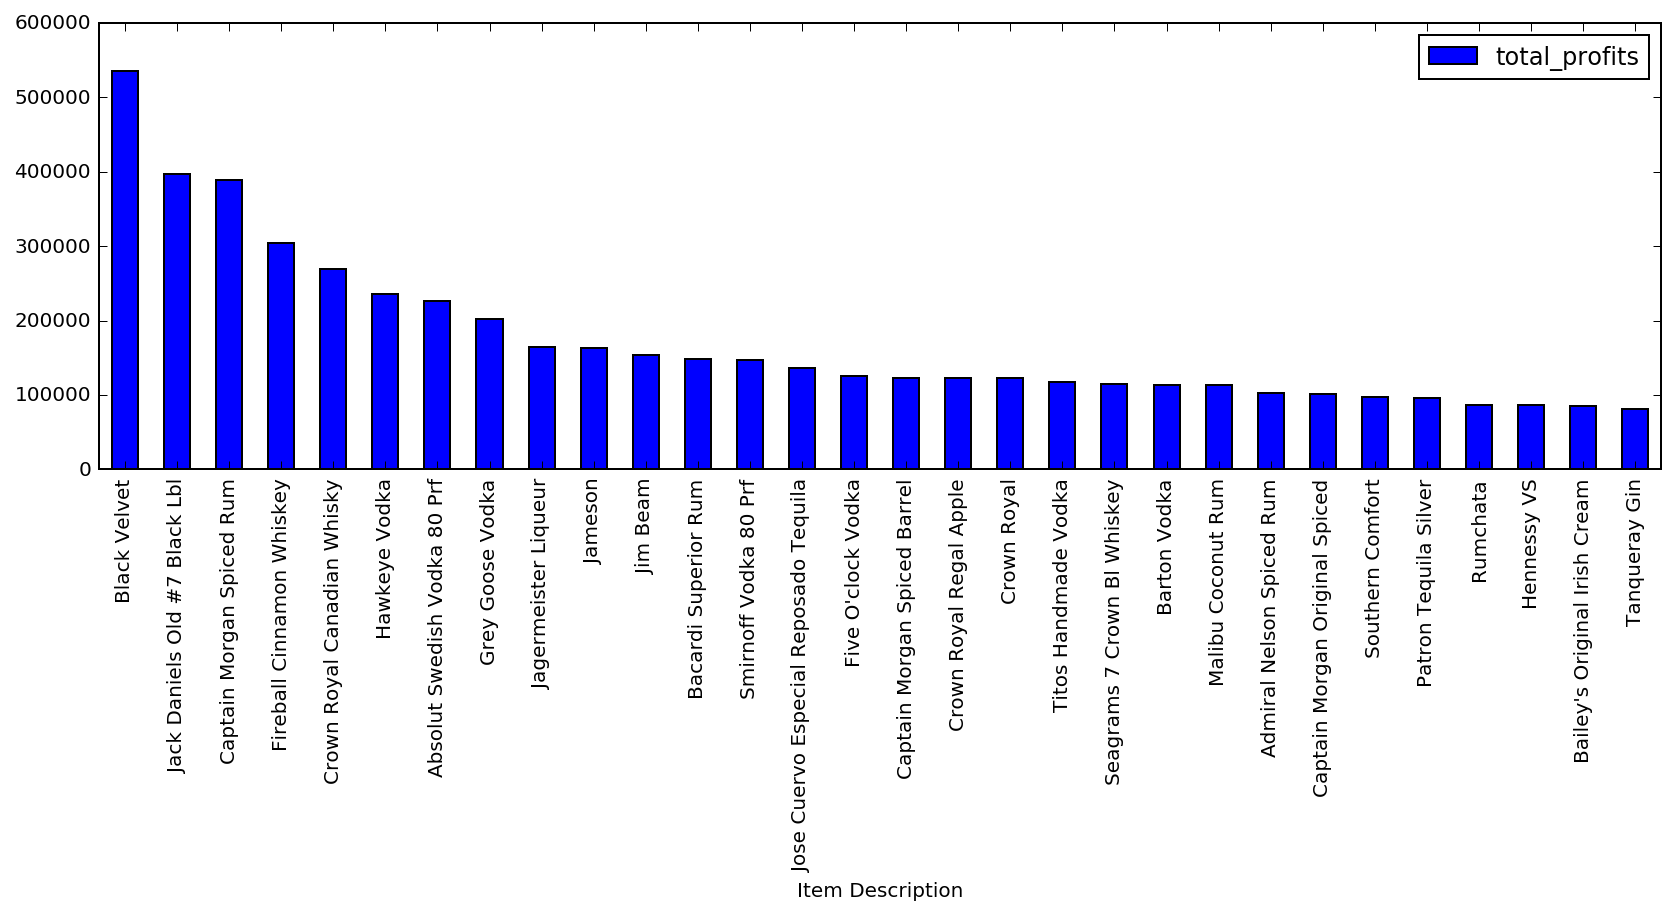

In [189]:
# Yes. Below are the 30 liquor brands that have the highest total profits
iowa.groupby(['Item Description'])[['total_profits']].sum().sort_values('total_profits', ascending = False).head(30).plot(kind = 'bar',figsize=(14,4))

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [190]:
# sore size is defined by volume sold
#this finds the 100 largest stores 

In [191]:
large_stores = iowa.groupby(['Store Number'])[['Volume Sold (Gallons)']].sum().sort_values('Volume Sold (Gallons)', ascending = False).head(100)
large_stores.reset_index()
large_list = list(large_stores.index)
large_mask = iowa['Store Number'].isin(large_list)
top_stores = iowa[large_mask]
top_stores.head(2)

,Bottle Volume (ml),Bottles Sold,Broad_Category,Category,Category Name,City,County,County Number,DAY,Date,...,Sale (Dollars),State Bottle Cost,State Bottle Retail,Store Number,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters),YEAR,Zip Code,total_profits
1,750,2,Whiskey,1011100.0,BLENDED WHISKIES,DAVENPORT,Scott,82.0,2,2016-03-02,...,41.26,13.75,20.63,2614,395,0.40,1.5,2016,52807,13.76
2,1000,24,Whiskey,1011200.0,STRAIGHT BOURBON WHISKIES,CEDAR FALLS,Black Hawk,7.0,11,2016-02-11,...,453.36,12.59,18.89,2106,65,6.34,24.0,2016,50613,151.20


In [192]:
# this finds the 5 best selling liquor categories of the largest stores

In [193]:
top_stores.groupby(['Broad_Category'])[['Bottles Sold']].sum().sort_values('Bottles Sold', ascending = False).head()

,Bottles Sold
Broad_Category,
Whiskey,329496
Vodka,321320
Rum,106092
Gin,80813
Liquers,75335


In [194]:
# This finds the 100 smallest stores

In [195]:
small_stores = iowa.groupby(['Store Number'])[['Volume Sold (Gallons)']].sum().sort_values('Volume Sold (Gallons)').head(100)
small_stores.reset_index()
small_list = list(small_stores.index)
small_mask = iowa['Store Number'].isin(small_list)
mnp_stores = iowa[small_mask]
mnp_stores.head(2)

,Bottle Volume (ml),Bottles Sold,Broad_Category,Category,Category Name,City,County,County Number,DAY,Date,...,Sale (Dollars),State Bottle Cost,State Bottle Retail,Store Number,Vendor Number,Volume Sold (Gallons),Volume Sold (Liters),YEAR,Zip Code,total_profits
79,750,12,Vodka,1031080.0,VODKA 80 PROOF,GUTHRIE CENTER,Guthrie,39.0,14,2016-03-14,...,60.72,3.37,5.06,5191,297,2.38,9.00,2016,50115,20.28
118,750,3,Whiskey,1011200.0,STRAIGHT BOURBON WHISKIES,LOHRVILLE,Calhoun,13.0,22,2015-12-22,...,47.22,10.49,15.74,5193,65,0.59,2.25,2015,51453,15.75


In [196]:
# finds the top 5 selling liquor categories from the smallest stores

In [197]:
mnp_stores.groupby(['Broad_Category'])[['Bottles Sold']].sum().sort_values('Bottles Sold', ascending = False).head()

,Bottles Sold
Broad_Category,
Vodka,2945
Whiskey,2612
Rum,888
Brandies,658
Gin,510


In [198]:
# they should place the tax on all alcohol that falls in the liquor category.
# this is the only liquor cateogry that is in the largest stores top sellers but no the 
# mom and pop stores top sellers 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [199]:
sales2015 = ((iowa['YEAR']==2015) & (iowa['MONTH']<= 3))
sales2016 = ((iowa['YEAR']==2016) & (iowa['MONTH']<= 3))

iowaQ1_2015 = iowa[sales2015].groupby(['Store Number', 'County'])[['total_profits']].sum().reset_index()
iowaQ1_2016 = iowa[sales2016].groupby(['Store Number', 'County'])[['total_profits']].sum().reset_index()
iowaQ1_2015.columns = ['Store Number','County', 'Q1_15 Profit']
iowaQ1_2015.head()
iowaQ1_2016.columns = ['Store Number','County', 'Q1_16 Profit']
iowaQ1_2016.head()

,Store Number,County,Q1_16 Profit
0,2106,Black Hawk,10189.68
1,2113,Webster,693.49
2,2130,Black Hawk,9288.29
3,2152,Cerro Gordo,304.08
4,2178,Allamakee,1868.76


In [200]:
iowaQ1 = pd.merge(iowaQ1_2015,iowaQ1_2016, on=('Store Number','County'))
iowaQ1.head()

,Store Number,County,Q1_15 Profit,Q1_16 Profit
0,2106,Black Hawk,13108.37,10189.68
1,2113,Webster,944.72,693.49
2,2130,Black Hawk,8108.68,9288.29
3,2152,Cerro Gordo,668.60,304.08
4,2178,Allamakee,1961.28,1868.76


In [201]:
iowaQ1['growth'] = iowaQ1['Q1_16 Profit'] - iowaQ1['Q1_15 Profit']
iowaQ1.head()

,Store Number,County,Q1_15 Profit,Q1_16 Profit,growth
0,2106,Black Hawk,13108.37,10189.68,-2918.69
1,2113,Webster,944.72,693.49,-251.23
2,2130,Black Hawk,8108.68,9288.29,1179.61
3,2152,Cerro Gordo,668.60,304.08,-364.52
4,2178,Allamakee,1961.28,1868.76,-92.52


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [202]:
# profit growth = (Q1_16 - Q1_15)/Q_15
iowaQ1['profit growth'] = iowaQ1['growth'] / iowaQ1['Q1_15 Profit']
iowaQ1.head()

,Store Number,County,Q1_15 Profit,Q1_16 Profit,growth,profit growth
0,2106,Black Hawk,13108.37,10189.68,-2918.69,-0.222658
1,2113,Webster,944.72,693.49,-251.23,-0.265931
2,2130,Black Hawk,8108.68,9288.29,1179.61,0.145475
3,2152,Cerro Gordo,668.60,304.08,-364.52,-0.545199
4,2178,Allamakee,1961.28,1868.76,-92.52,-0.047173


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [203]:
iowaQ1.groupby(['County'])[['profit growth']].apply(np.mean).sort_values('profit growth', ascending = False).head(4)
# The Owner should consider one of the following counties for the store

,profit growth
County,
Dickinson,6.942539
Decatur,3.346597
Allamakee,3.260839
Cedar,1.492405


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [204]:
sales2015 = ((iowa['YEAR']==2015) & (iowa['MONTH']<= 3))
sales2016 = ((iowa['YEAR']==2016) & (iowa['MONTH']<= 3))

iowaQ1_2015 = iowa[sales2015].groupby(['Store Number', 'County', 'Broad_Category'])[['total_profits']].sum().reset_index()
iowaQ1_2016 = iowa[sales2016].groupby(['Store Number', 'County', 'Broad_Category'])[['total_profits']].sum().reset_index()
iowaQ1_2015.columns = ['Store Number','County','Broad_Category', 'Q1_15 Profit']

iowaQ1_2016.columns = ['Store Number','County','Broad_Category', 'Q1_16 Profit']

iowaQ1 = pd.merge(iowaQ1_2015,iowaQ1_2016, on=('Store Number','County','Broad_Category'))
iowaQ1['growth'] = iowaQ1['Q1_16 Profit'] - iowaQ1['Q1_15 Profit']
iowaQ1['profit growth'] = iowaQ1['growth'] / iowaQ1['Q1_15 Profit']
iowaQ1.head()

,Store Number,County,Broad_Category,Q1_15 Profit,Q1_16 Profit,growth,profit growth
0,2106,Black Hawk,Brandies,241.92,156.72,-85.20,-0.352183
1,2106,Black Hawk,Gin,762.99,406.50,-356.49,-0.467228
2,2106,Black Hawk,Liquers,2516.04,736.04,-1780.00,-0.707461
3,2106,Black Hawk,Rum,2379.90,2146.50,-233.40,-0.098071
4,2106,Black Hawk,Schnapps,1034.04,1542.72,508.68,0.491935


In [205]:
iowaQ1.groupby(['County','Broad_Category'])[['profit growth']].apply(np.mean).sort_values('profit growth', ascending = False).head(8)

# The Owner should consider one of the following county liquor pairs for the store.
# based on the graph below Schnapps ida an Winneshiek county has the highest profit grow from the past year

,,profit growth
County,Broad_Category,
Ida,Schnapps,22.738351
Winneshiek,Schnapps,20.934346
Ida,Rum,14.241390
Calhoun,Rum,11.737569
Allamakee,Gin,11.124748
Appanoose,Tequila,10.214104
Fayette,Tequila,10.138000
Allamakee,Rum,8.219610


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?